<a href="https://colab.research.google.com/github/tjpapenfuss/AnalyticsEdge/blob/main/HW_7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we are using a Google Colaboratory (Colab) notebook. Google Colab allows us to train models on the cloud, regardless of the computational power of our laptop. This is particularly helpful for training neural networks, as training big networks is generally computationally demanding. 

You are able to run cells in this notebook, but you cannot make/save changes here. To do so, click on File on the top menu and make a copy of this notebook to your Google Drive. Then, you can make and save changes in that copy.

When you are done with this homework, simply make a PDF of this notebook (by clicking on File -> Print -> PDF) and submit the resulting PDF to Gradescope. Make sure your responses are properly recorded in your PDF.

# Loading packages and data

First, we need to install Keras, which is the library we use for training neural networks. 

We note that Google Colab notebooks are run on Virtual Machines (VM). This means that no permanent hardware/memory is assigned to your notebook and your resources are recycled when you close this notebook. Hence, we need to install Keras everytime we run this notebook.

In [1]:
devtools::install_github("rstudio/keras")

vctrs       (0.5.0 -> 0.5.1) [CRAN]
png         (NA    -> 0.1-7) [CRAN]
here        (NA    -> 1.0.1) [CRAN]
RcppTOML    (NA    -> 0.1.7) [CRAN]
Rcpp        (NA    -> 1.0.9) [CRAN]
reticulate  (NA    -> 1.26 ) [CRAN]
config      (NA    -> 0.3.1) [CRAN]
tfautograph (NA    -> 0.3.2) [CRAN]
tfruns      (NA    -> 1.5.1) [CRAN]
zeallot     (NA    -> 0.1.0) [CRAN]
tensorflow  (NA    -> 2.9.0) [CRAN]


Installing 11 packages: vctrs, png, here, RcppTOML, Rcpp, reticulate, config, tfautograph, tfruns, zeallot, tensorflow

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp4yoFlD/remotes5036b8fa35/rstudio-keras-b778be2/DESCRIPTION’ ... OK
* preparing ‘keras’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘keras/man-roxygen’
* building ‘keras_2.9.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



As always, we need to call the libraries we will use.

In [16]:
library(keras)
set.seed(123)

The next step is to load data. We are using MNIST dataset, which is a hand-written digit classification dataset. You can read more about this dataset here:
https://en.wikipedia.org/wiki/MNIST_database .


Keras has a built-in function to load MNIST. The following cell downloads the data and divides it into train and test samples.

In [17]:
mnist <- dataset_mnist()
x_train_tensor <- mnist$train$x
y_train <- mnist$train$y
x_test_tensor <- mnist$test$x
y_test <- mnist$test$y

# Exploring the data

In [24]:
summary(x_train_tensor)
mnist

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   33.32    0.00  255.00 

$train
$train$x
, , 1

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0

a) What is the training data size? How many samples are in the training data? (10 points)

In [10]:
nrow(x_train_tensor)

[1] 60000



```
# This is formatted as code
```

b) Show a few samples from the training data. Discuss at least two issues that might make the prediction job harder. (10 points)

Issue: Varability in font
Issue: Resolution 
Issue: 1 vs 7 is very difficult to tell the difference. 

HINT: You might want to use the function `image`.

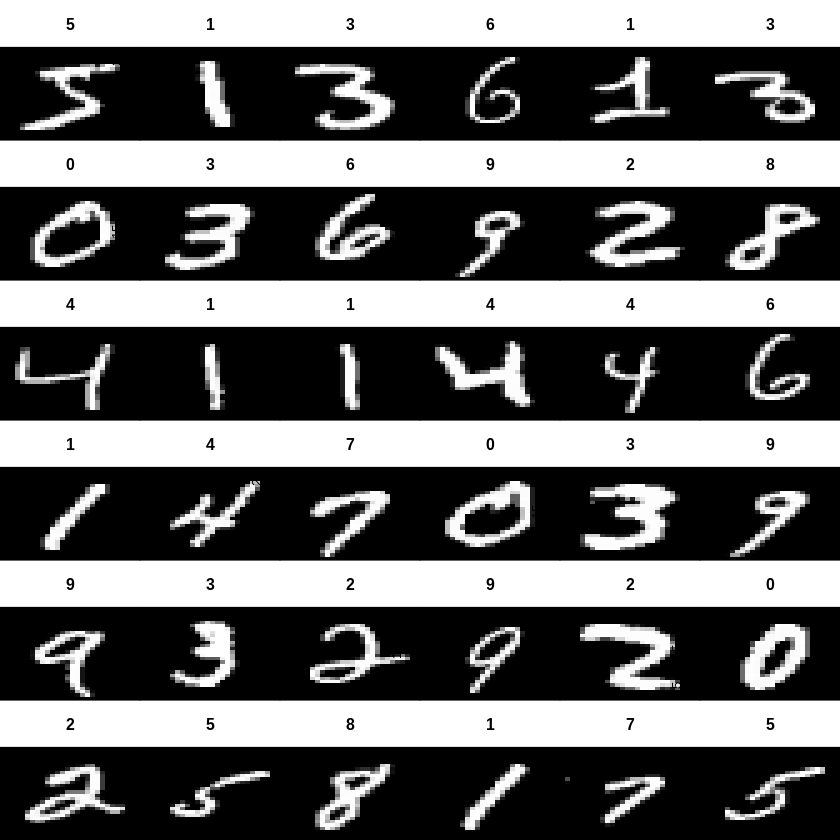

In [32]:
# visualize the digits
par(mfcol=c(6,6))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

for (idx in 1:36) { 
    im <- x_train_tensor[idx,,] 
    im <- t(apply(im, 2, rev)) 
    image(1:28, 1:28, im, col=gray((0:255)/255), 
        xaxt='n', main=paste(y_train[idx]))
}


# Processing the data

Next, we reshape the train and test data to matrices of the form num_samples*784, so we don't have to work with 3-dimensional data. We also scale the images so each pixel is between 0 and 1, instead of the original 0 and 255.

In [34]:
# reshape
x_train = x_train_tensor
x_test = x_test_tensor

dim(x_train) <- c(nrow(x_train_tensor), 784)
dim(x_test) <- c(nrow(x_test_tensor), 784)
# rescale
x_train <- x_train / 255
x_test <- x_test / 255



We also ensure the outputs are treated as a classification problem, not regression.

In [35]:
y_train <- to_categorical(y_train, 10)
length(y_train)
y_test <- to_categorical(y_test, 10)

[1] 600000

# An example of defining and training a model

To define a neural network in Keras, we use a syntax as follows:

In [36]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 128, activation = "relu", input_shape = c(784)) %>% 
  layer_dense(units = 64, activation = "relu", input_shape = c(784)) %>% 
  layer_dense(units = 32, activation = "relu", input_shape = c(784)) %>% 
  layer_dense(units = 16, activation = "relu", input_shape = c(784)) %>% 
  layer_dense(units = 8, activation = "relu", input_shape = c(784)) %>% 
  layer_dense(units = 10, activation = "softmax")


summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 128)                     100480      
 dense_4 (Dense)                    (None, 64)                      8256        
 dense_3 (Dense)                    (None, 32)                      2080        
 dense_2 (Dense)                    (None, 16)                      528         
 dense_1 (Dense)                    (None, 8)                       136         
 dense (Dense)                      (None, 10)                      90          
Total params: 111,570
Trainable params: 111,570
Non-trainable params: 0
________________________________________________________________________________


*In* the code above, we define the network layer by layer (from input to output). For each layer, we need to specify how many units there are in that layer, what activation function is used by them, and what is the input size of the layer. For example, the first layer in the above syntax is a dense (i.e. fully connected) layer of 128 units (i.e. neurons), each using the activation function ReLU. Note that we use softmax activation for the last layer, as we are dealing with a classification task. 
The function ```summay``` prints a summary of the model, as shown above.



Next, we have to compile the model, i.e. tell the training function what loss function to use for training (cross entropy is used here, which is common for classification problems), what optimization algorithm to use, and what metric to use for evaluating the classification problem (accuracy here). 

In [37]:
model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = optimizer_rmsprop(),
  metrics = c("accuracy")
)



```
# This is formatted as code
```

Next step is to train the model. The function fit trains the neural network for us, based on the model we compiled before. The training will continue for 30 epochs, i.e. 30 passes will be done on the whole data. The batch size is set to 64 here. This means at each update of the model, only 64 samples are used. This also implies that there are #num_samples/64 many updates per epoch, to complete a pass over data. Finally, 20% of the training data will be used for validation purposes, to select the final best model.

We note that training neural networks can take up to 10 minutes, so you might have to wait to see the results.

In [38]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 64, 
  validation_split = 0.2
)

The code below plots the training history of the model and report the accuracy on the test data.


Final epoch (plot to see history):
        loss: 0.007442
    accuracy: 0.9979
    val_loss: 0.3018
val_accuracy: 0.9734 

loss accuracy 
 0.26321  0.97450

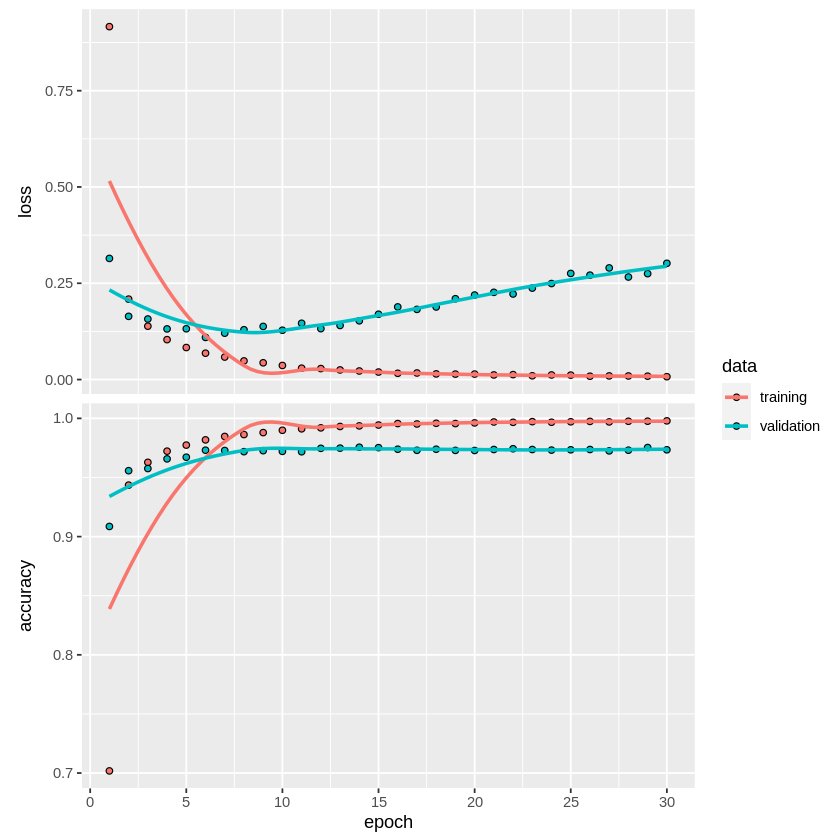

In [39]:
plot(history)
history
model %>% evaluate(x_test, y_test)

# Questions

c) Explain the numbers and figures you see above. Do you think the model in underfitting or overfitting? (10 points)



Response: The model is first underfitting (0 to 6) then starts to overfit after 9 epochs. 

d) Train a neural network with one hidden layer, with 32 units. Report the statistics of your trained model. (15 points)

In [42]:
#neural network with two hidden layers, ReLU
model_keras <- keras_model_sequential()

In [43]:

model_keras %>% 
  # First hidden layer
  layer_dense(
    units              = 32, # number of nodes
    kernel_initializer = "normal", 
    input_shape        = ncol(x_train_tensor)) %>% layer_activation_relu() %>% 
  # Output layer
  layer_dense(
    units              = 1, 
    kernel_initializer = "uniform", 
    activation         = "sigmoid") %>% 
  # Compile ANN
  compile(
    optimizer = 'adam',
    loss      = 'binary_crossentropy',
    metrics = 'accuracy'
  )
model_keras
# Fit the keras model to the training data
fit_keras <- fit(
  object           = model_keras, 
  x                = x_train_tensor, 
  y                = y_train,
  batch_size       = 500, 
  epochs           = 100,
  validation_split = 0.3
)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_11 (Dense)                   (None, 32)                      928         
 re_lu_2 (ReLU)                     (None, 32)                      0           
 dense_10 (Dense)                   (None, 1)                       33          
Total params: 961
Trainable params: 961
Non-trainable params: 0
________________________________________________________________________________

ERROR: ignored

e) Train a neural network with two hidden layers, first with 1024 units and the second one with 512 units. Report the statistics of your trained model (This may take 10 minutes or more). (15 points)

f) Train a neural network with two hidden layers, first with 256 units and the second one with 128 units. Report the statistics of your trained model. (15 points)

g) Compares the models you trained above, in terms of in-sample and out-of-sample performance, and runtime. What insights did you gain from these experiments? (10 points)

Response:

h) Show an example of the **test** data where your model from part (f) predicted incorrectly. Why do you think caused the error? (15 points)